# PROJET STATISTIQUE

* ## Installation et chargement des packages necessaires

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# CHARGEMENTS DES PACKAGES NECESSAIRES
import pandas as pd
from collections import Counter # va permettre de calculer les mots frequents
from wordcloud import WordCloud # va permettre de faire un nuage de mots pour faire ressortir les mots les plus frequents
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

* ## IMPORTATION DES DONNEES

In [3]:
data = pd.read_excel("makeorg_sport.xlsx")
data_insee = pd.read_excel("Pyra2024.xlsx")
data_insee = data_insee.drop([0,1,2,3,4]).reset_index(drop=True)

##  STATISTIQUES DESCRIPTIVES

In [4]:
print(data_insee)

    Pyramide des √¢ges au 1er janvier 2024, France   Unnamed: 1 Unnamed: 2  \
0                                            2023            0     324842   
1                                            2022            1     350041   
2                                            2021            2     359212   
3                                            2020            3     358872   
4                                            2019            4     374866   
..                                            ...          ...        ...   
97                                           1926           97       7851   
98                                           1925           98       4959   
99                                           1924           99       3112   
100                                 1923 ou avant  100 ou plus       4647   
101                                         Total          NaN   33117745   

    Unnamed: 3 Unnamed: 4  
0       310704     635546  
1       335003    

In [5]:
print(data.describe())

               √Çge  D√©partement  Nb de votes   Zone score       % pour  \
count  1516.000000   999.000000  1909.000000  1909.000000  1909.000000   
mean     50.662929    69.575576   166.039811     0.585409     0.621671   
std      13.770077   125.411204   142.210545     0.294581     0.159325   
min      12.000000     1.000000    16.000000     0.040000     0.054000   
25%      40.000000    32.000000    96.000000     0.291000     0.526000   
50%      51.000000    59.000000    97.000000     0.643000     0.646000   
75%      61.000000    76.000000   202.000000     0.822000     0.742000   
max      87.000000   974.000000  1584.000000     1.150000     0.937000   

          % contre     % neutre  
count  1909.000000  1909.000000  
mean      0.168306     0.209935  
std       0.110576     0.092298  
min       0.012000     0.020000  
25%       0.090000     0.148000  
50%       0.142000     0.194000  
75%       0.220000     0.260000  
max       0.816000     0.815000  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Proposition      1909 non-null   object 
 1   Nom d'auteur     1909 non-null   object 
 2   √Çge              1516 non-null   float64
 3   D√©partement      999 non-null    float64
 4   Zone d'adh√©sion  1909 non-null   object 
 5   Nb de votes      1909 non-null   int64  
 6   Zone score       1909 non-null   float64
 7   % pour           1909 non-null   float64
 8   % contre         1909 non-null   float64
 9   % neutre         1909 non-null   float64
 10  Id               1909 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 164.2+ KB
None


* Nombre de mots par propositions

In [7]:
nb_mots = [len(proposition.split()) for proposition in data["Proposition"]]

# Cr√©er un DataFrame
df = pd.Series(nb_mots)
data['nb_de_mots'] = df 
# Afficher le r√©sultat dans un format similaire
print(data['nb_de_mots'])

0       21
1       20
2       28
3       26
4       23
        ..
1904    17
1905    19
1906    19
1907    21
1908    15
Name: nb_de_mots, Length: 1909, dtype: int64


* # Analyse des donn√©es manquantes

In [8]:
# Visualisation des donn√©es manquantes
missing_values = data.isnull().sum()
print(missing_values)


Proposition          0
Nom d'auteur         0
√Çge                393
D√©partement        910
Zone d'adh√©sion      0
Nb de votes          0
Zone score           0
% pour               0
% contre             0
% neutre             0
Id                   0
nb_de_mots           0
dtype: int64


In [9]:
# Proportion des donn√©es manquantes par colonne
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Proposition         0.000000
Nom d'auteur        0.000000
√Çge                20.586695
D√©partement        47.668937
Zone d'adh√©sion     0.000000
Nb de votes         0.000000
Zone score          0.000000
% pour              0.000000
% contre            0.000000
% neutre            0.000000
Id                  0.000000
nb_de_mots          0.000000
dtype: float64


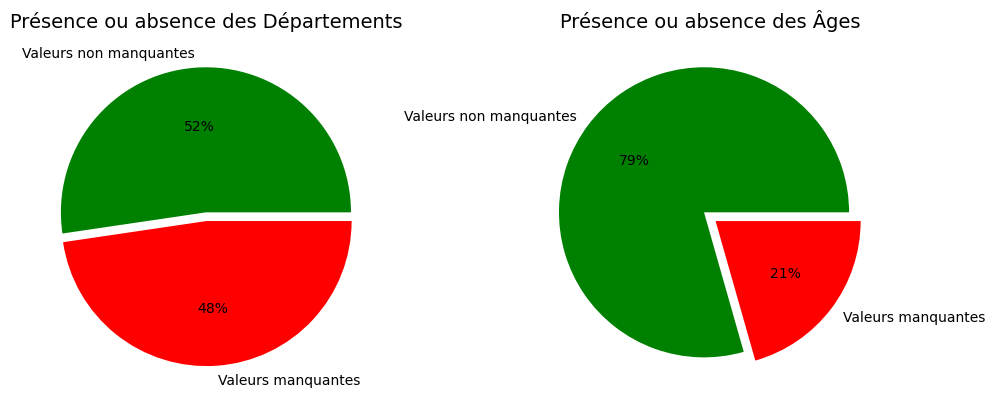

In [10]:
# Cr√©ation de la figure avec deux sous-graphiques c√¥te √† c√¥te
# Configuration des graphiques
fig, axes = plt.subplots(1, 2, figsize=(10, 12))  # 2 lignes, 1 colonne, taille personnalis√©e

# Donn√©es et param√®tres pour le premier graphique
colors = ["green", "red"]
labels = ["Valeurs non manquantes", "Valeurs manquantes"]
explode = [0.03, 0.03]
bdd = data['D√©partement'].notnull().value_counts()

# Premier graphique (Pr√©sence ou absence des D√©partements)
axes[0].pie(
    bdd, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[0].set_title("Pr√©sence ou absence des D√©partements", fontsize=14)

# Donn√©es et param√®tres pour le deuxi√®me graphique
explode = [0.05, 0.05]
bdd1 = data['√Çge'].notnull().value_counts()

# Deuxi√®me graphique (Pr√©sence ou absence des √Çges)
axes[1].pie(
    bdd1, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[1].set_title("Pr√©sence ou absence des √Çges", fontsize=14)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


* ## VISUALISATION GRAPHIQUE DES DONNEES

C:\Users\DELL\AppData\Local\Temp\ipykernel_4000\876220517.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['√Çge'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat = 'proportion')


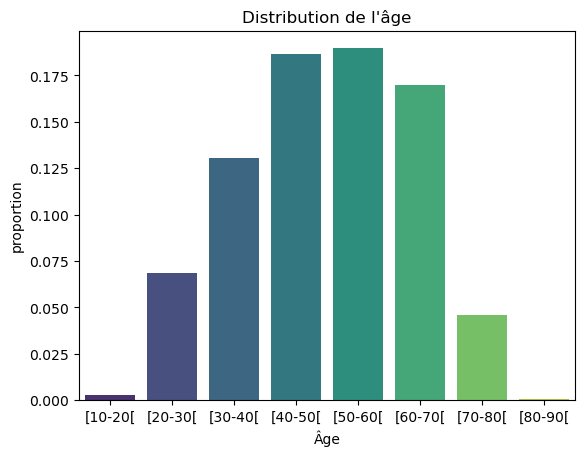

In [11]:
bins = [10,20,30,40,50,60,70,80,90]  # Limites des intervalles
labels = ['[10-20[', '[20-30[', '[30-40[', '[40-50[', '[50-60[', '[60-70[', '[70-80[','[80-90[']

# Utiliser pd.cut directement dans le graphique
sns.countplot(x=pd.cut(data['√Çge'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat = 'proportion')
plt.title('Distribution de l\'√¢ge')
plt.show()

In [12]:
#Pour tracer le graphe

data1 = pd.ExcelFile("Pyra2024.xlsx")

df_france = data1.parse("2024 - France")

df_france.head()

df_clean = data1.parse("2024 - France", skiprows=4)

df_clean.columns = ["Ann√©e de naissance", "√Çge r√©volu", "Nombre d'hommes", "Nombre de femmes", "Ensemble"]

df_clean = df_clean.dropna(subset=["√Çge r√©volu", "Ensemble"])

df_clean.head()

df_clean = df_clean[df_clean["√Çge r√©volu"] != "√Çge r√©volu"]

df_clean["√Çge r√©volu"] = pd.to_numeric(df_clean["√Çge r√©volu"], errors='coerce')

df_clean["Ensemble"] = pd.to_numeric(df_clean["Ensemble"], errors='coerce')

df_clean = df_clean.dropna()

# Filtrer la population fran√ßaise sur la plage 12-87 ans

df_filtered = df_clean[(df_clean["√Çge r√©volu"] >= 12) & (df_clean["√Çge r√©volu"] <= 87)]

 

# Calculer les effectifs pour chaque √¢ge

ages_french_population = df_filtered["√Çge r√©volu"]

counts_french_population = df_filtered["Ensemble"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_4000\3674586847.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cat√©gories"] = pd.cut(df_filtered["√Çge r√©volu"], bins=bins, labels=labels, include_lowest=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4000\3674586847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


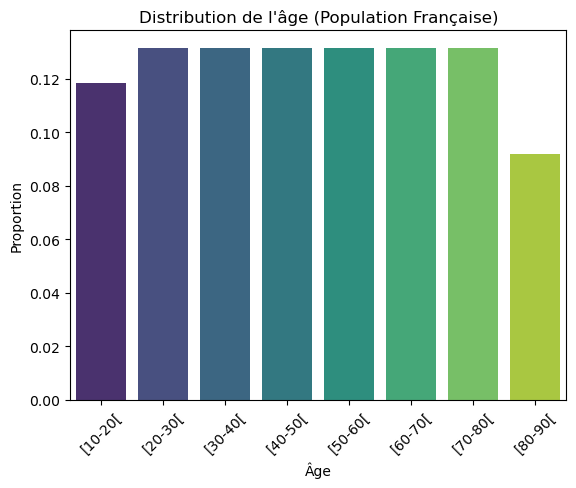

In [13]:
# D√©finir les intervalles et les labels

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]

labels = ['[10-20[', '[20-30[', '[30-40[', '[40-50[', '[50-60[', '[60-70[', '[70-80[', '[80-90[']

 

# Ajouter une colonne de cat√©gories d'√¢ge

df_filtered["Cat√©gories"] = pd.cut(df_filtered["√Çge r√©volu"], bins=bins, labels=labels, include_lowest=False)

 

# Tracer le graphique de proportion

sns.countplot(

    x=df_filtered["Cat√©gories"],

    palette='viridis',

    order=labels,

    stat='proportion'

)

plt.title("Distribution de l'√¢ge (Population Fran√ßaise)")

plt.xlabel("√Çge")

plt.ylabel("Proportion")

plt.xticks(rotation=45)

plt.show()


In [14]:
#test de khi 2


from scipy.stats import chisquare

df_filtered["Cat√©gories"] = pd.cut(df_filtered["√Çge r√©volu"], bins=bins, labels=labels, include_lowest=False)

france_counts = df_filtered["Cat√©gories"].value_counts()

france_proportions = france_counts / france_counts.sum()  # Proportions normalis√©es


# √âchantillon : calcul des proportions pour chaque cat√©gorie

sample_counts = pd.cut(data['√Çge'], bins=bins, labels=labels, include_lowest=False).value_counts()

sample_proportions = sample_counts / sample_counts.sum()  # Proportions normalis√©es

 

# Test du chi¬≤

chi2_stat, p_value = chisquare(f_obs=sample_proportions, f_exp=france_proportions)

 

# R√©sultats

chi2_stat, p_value

C:\Users\DELL\AppData\Local\Temp\ipykernel_4000\660734910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Cat√©gories"] = pd.cut(df_filtered["√Çge r√©volu"], bins=bins, labels=labels, include_lowest=False)


(0.4870637423567994, 0.9994924835718528)

In [15]:


# #Zoom sur le graphe de distribution des votes

 

# Identifier l'index de la barre la plus longue

# max_count_index = np.argmax(counts)

# max_bin_start = bin_edges[max_count_index]

# max_bin_end = bin_edges[max_count_index + 1]

# filtered_values = values[(values >= max_bin_start) & (values < max_bin_end)]

 

# Recalculer un histogramme avec des bins plus fins sur cette plage

# fine_bins = 10 

# fine_counts, fine_bin_edges = np.histogram(filtered_values, bins=fine_bins)

 

# plt.figure(figsize=(8, 5))

# plt.bar(fine_bin_edges[:-1], fine_counts, width=np.diff(fine_bin_edges), edgecolor='black', align='edge', color='orange')

# plt.xlim(max_bin_start, max_bin_end) 

# plt.ylim(0, fine_counts.max() * 1.1) 

# plt.title("Zoom sur la barre la plus longue")

# plt.xlabel("Nombre de votes")

# plt.ylabel("Fr√©quence")

# plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()

In [16]:
# S√©lectionner les colonnes pertinentes : '√Çge r√©volu' et 'Ensemble' (Total)
df_insee_clean = data_insee[['Unnamed: 1', 'Unnamed: 4']]

# Nettoyer les donn√©es (enlever les lignes inutiles comme 'Total')
df_insee_clean = df_insee_clean.dropna()
import pandas as pd

# Convertir les √¢ges et les nombres en types num√©riques
df_insee_clean['√Çge r√©volu'] = pd.to_numeric(df_insee_clean['Unnamed: 1'], errors='coerce')
df_insee_clean['Ensemble'] = pd.to_numeric(df_insee_clean['Unnamed: 4'], errors='coerce')

# Supprimer les lignes o√π les donn√©es sont manquantes apr√®s conversion
df_insee_clean = df_insee_clean.dropna()

# D√©finir les bornes des classes d'√¢ge, ici de 0 √† 99 avec des tranches de 10 ans
bins = list(range(10, 90, 10)) + [np.inf]  # Ajout de +inf pour la classe "100+"

# Nom des classes d'√¢ge
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

# Utiliser pd.cut pour diviser l'√¢ge r√©volu en classes
df_insee_clean['Classe d\'√¢ge'] = pd.cut(df_insee_clean['√Çge r√©volu'], bins=bins, labels=labels, right=False)

# Calculer la somme des effectifs par classe d'√¢ge
df_age_groups = df_insee_clean.groupby('Classe d\'√¢ge')['Ensemble'].sum().reset_index()

# Afficher le r√©sultat
print(df_age_groups)

# Normaliser les donn√©es de l'INSEE pour avoir des proportions
#population_insee_normalized = population_insee / population_insee.sum()

# Afficher les donn√©es nettoy√©es et normalis√©es
#print("Classes d'√¢ge de l'INSEE:", age_classes_insee)
#print("Distribution normalis√©e de l'INSEE:", population_insee_normalized)

  Classe d'√¢ge  Ensemble
0        10-19   8550774
1        20-29   7746107
2        30-39   8272007
3        40-49   8474040
4        50-59   8965690
5        60-69   8193149
6        70-79   6653685
7          80+   4108835


C:\Users\DELL\AppData\Local\Temp\ipykernel_4000\2658752594.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_groups = df_insee_clean.groupby('Classe d\'√¢ge')['Ensemble'].sum().reset_index()


In [17]:
df_participants = data['√Çge']
df_participants['Classe d\'√¢ge'] = pd.cut(data['√Çge'], bins=bins, labels=labels, include_lowest=False)
# Compter les effectifs par classe d'√¢ge
age_distribution_participants = df_participants['Classe d\'√¢ge'].value_counts().sort_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4000\4244834141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_participants['Classe d\'√¢ge'] = pd.cut(data['√Çge'], bins=bins, labels=labels, include_lowest=False)


In [18]:
# Effectifs des classes d'√¢ge des participants
observed = age_distribution_participants.values#/age_distribution_participants.values.sum()

# Effectifs des classes d'√¢ge de la population fran√ßaise (INSEE)
expected = df_age_groups['Ensemble'].values #/ df_age_groups['Ensemble'].values.sum()

# Normaliser les effectifs de l'INSEE pour qu'ils aient la m√™me somme que les participants
#expected = expected * (observed.sum() / expected.sum())

# V√©rifier les valeurs
print("Effectifs observ√©s (participants) :", observed)
print("Effectifs attendus (INSEE normalis√©) :", expected)


Effectifs observ√©s (participants) : [  5 131 249 356 362 324  88   1]
Effectifs attendus (INSEE normalis√©) : [8550774 7746107 8272007 8474040 8965690 8193149 6653685 4108835]


In [19]:
import scipy.stats as stats
import numpy as np

# Cr√©ation d'un tableau de contingence
tableau_contingence = np.array([observed,  # participant
                                expected])  # Total

# Test du Chi¬≤ d'ind√©pendance
chi2, p, dof, expect = stats.chi2_contingency(tableau_contingence)

# R√©sultats
print(f"Chi¬≤ : {chi2:.4f}")
print(f"P-valeur : {p:.4f}")
print(f"Degr√©s de libert√© : {dof}")
print(f"Tableau attendu :\n{expect}")

# Interpr√©tation
alpha = 0.05
if p < alpha:
    print("On rejette H0 : Il existe une relation entre les deux variables.")
else:
    print("On ne rejette pas H0 : Aucune relation significative n'est d√©tect√©e.")


Chi¬≤ : 625.8761
P-valeur : 0.0000
Degr√©s de libert√© : 7
Tableau attendu :
[[2.12627085e+02 1.92621047e+02 2.05701221e+02 2.10727715e+02
  2.22953429e+02 2.03742171e+02 1.65455376e+02 1.02171957e+02]
 [8.55056637e+06 7.74604538e+06 8.27205030e+06 8.47418527e+06
  8.96582905e+06 8.19326926e+06 6.65360754e+06 4.10873383e+06]]
On rejette H0 : Il existe une relation entre les deux variables.


In [20]:
import numpy as np
from scipy.stats import chisquare

# V√©rification des sommes initiales
print(f"Somme des observ√©s : {observed.sum()}")
print(f"Somme des attendus : {expected.sum()}")

# Normalisation des effectifs attendus
expected_adjusted = expected / expected.sum()
observed_adjusted = observed / observed.sum()

# V√©rification apr√®s ajustement
print(f"Somme des attendus ajust√©s : {expected_adjusted.sum()}")  

# Test du Khi¬≤
chi2_stat, p_value = chisquare(f_obs=observed_adjusted, f_exp=expected_adjusted)

# Affichage des r√©sultats
print(f"Statistique du Khi¬≤ : {chi2_stat:.2f}")
print(f"Valeur-p : {p_value:.4f}")


Somme des observ√©s : 1516
Somme des attendus : 60964287
Somme des attendus ajust√©s : 1.0
Statistique du Khi¬≤ : 0.41
Valeur-p : 0.9997


* ## Distribution du nombre de vote par proposition

C:\Users\DELL\AppData\Local\Temp\ipykernel_4000\2795427885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')


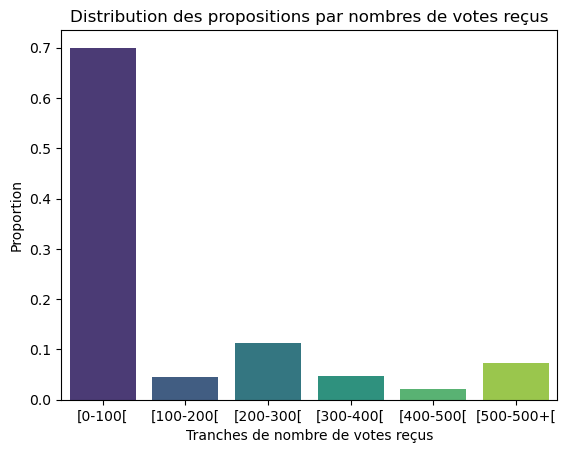

In [21]:
# D√©finir les intervalles et les √©tiquettes
bins = [0, 100, 200, 300, 400, 500, float('inf')]  # Limites des intervalles
labels = ['[0-100[', '[100-200[', '[200-300[', '[300-400[', '[400-500[', '[500-500+[']  # Noms des cat√©gories

# Utiliser pd.cut directement dans le graphique
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')

# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes re√ßus')
plt.xlabel('Tranches de nombre de votes re√ßus')
plt.ylabel('Proportion')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4000\2799486795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins,labels=labels, include_lowest=True),palette='viridis', stat ='proportion')


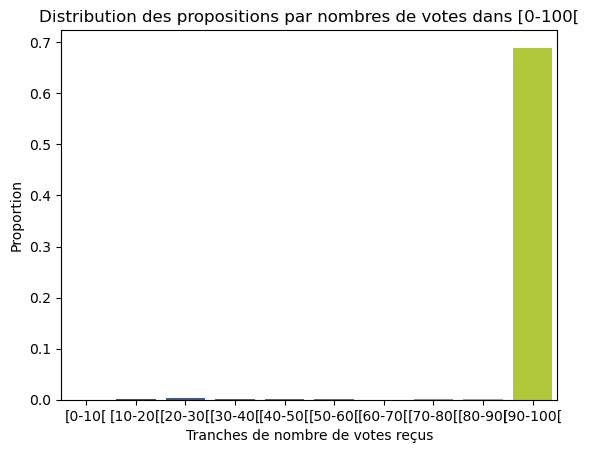

In [22]:
# D√©finir les intervalles et les √©tiquettes
bins = [0,10,20,30,40,50,60,70,80,90,100]  # Limites des intervalles
labels = ['[0-10[','[10-20[','[20-30[','[30-40[','[40-50[','[50-60[','[60-70[','[70-80[','[80-90[','[90-100[']  # Noms des cat√©gories

# Utiliser pd.cut directement dans le graphique
#sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')
#sns.histplot(data= data, x='Nb de votes',bins=bins, color=sns.color_palette('viridis', n_colors=10)[0], stat='proportion',cbar=True)
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins,labels=labels, include_lowest=True),palette='viridis', stat ='proportion')
#plt.xticks(ticks=np.arange(0,101,10))
# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes dans [0-100[')
plt.xlabel('Tranches de nombre de votes re√ßus')
plt.ylabel('Proportion')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4000\3142412916.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Nb de votes'], bins=bin,labels=labels,include_lowest=False),


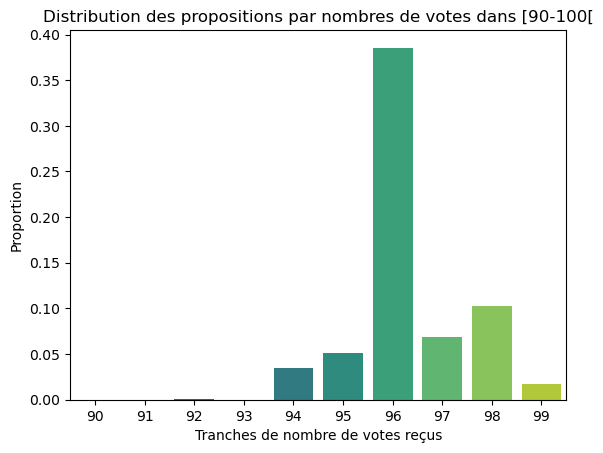

In [23]:
# D√©finir les intervalles et les √©tiquettes
bin = [89,90,91,92,93,94,95,96,97,98,99]  # Limites des intervalles
labels = ['90','91','92','93','94','95','96','97','98','99']  # Noms des cat√©gories
#plt.xticks(ticks=np.arange(90,101,1))
# Utiliser pd.cut directement dans le graphique
#sns.countplot(x=pd.cut(data['Nb de votes'], bins=bins, labels=labels, include_lowest=True), palette='viridis', stat ='proportion')
#sns.histplot(data= data,x='Nb de votes',bins=bin, color=sns.color_palette('viridis', n_colors=10)[0], stat='proportion')
sns.countplot(x=pd.cut(data['Nb de votes'], bins=bin,labels=labels,include_lowest=False),
              palette='viridis', stat ='proportion')

# Ajouter les titres et labels
plt.title('Distribution des propositions par nombres de votes dans [90-100[')
plt.xlabel('Tranches de nombre de votes re√ßus')
plt.ylabel('Proportion')
plt.show()

In [24]:
votes96 = (data['Nb de votes'] == 96).sum() / len(data)
print(votes96)

0.3855421686746988


* ## Analyse des votes

C:\Users\DELL\AppData\Local\Temp\ipykernel_4000\2954990707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = pd.cut(data['nb_de_mots'],bins = bins, labels = labels,include_lowest = True, right=True),palette = 'viridis',stat='proportion')


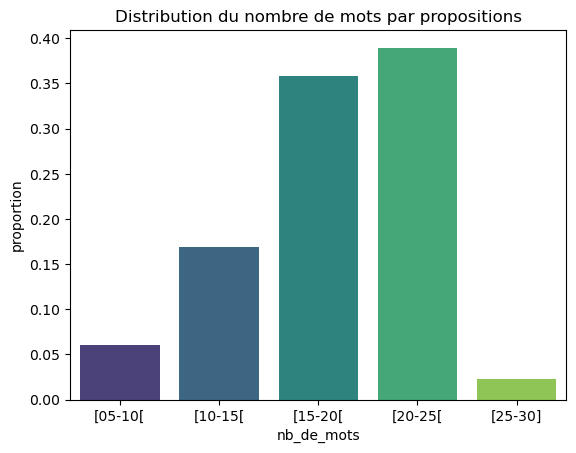

In [25]:
bins = [5,10,15,20,25,30]  # Limites des intervalles
labels = ['[05-10[','[10-15[', '[15-20[', '[20-25[','[25-30]']

sns.countplot(x = pd.cut(data['nb_de_mots'],bins = bins, labels = labels,include_lowest = True, right=True),palette = 'viridis',stat='proportion')
plt.title('Distribution du nombre de mots par propositions')
plt.show()

* ## Distribution du nombre de vote

In [26]:
# Fonction pour d√©terminer la cat√©gorie dominante
def get_dominant_category(row):
    if row['% pour'] > row['% contre'] and row['% pour'] > row['% neutre']:
        if row['% pour'] >0.5:
            return 'pour'
        else :
            return 'pol√©mique'
    elif row['% contre'] > row['% pour'] and row['% contre'] > row['% neutre']:
        if row['% contre'] >0.5:
            return 'contre'
        else :
            return 'pol√©mique'
    else:
        if row['% neutre'] >0.5:
            return 'neutre'
        else :
            return 'pol√©mique'

# Ajouter une nouvelle colonne
data['Cat√©gorie'] = data.apply(get_dominant_category, axis=1)

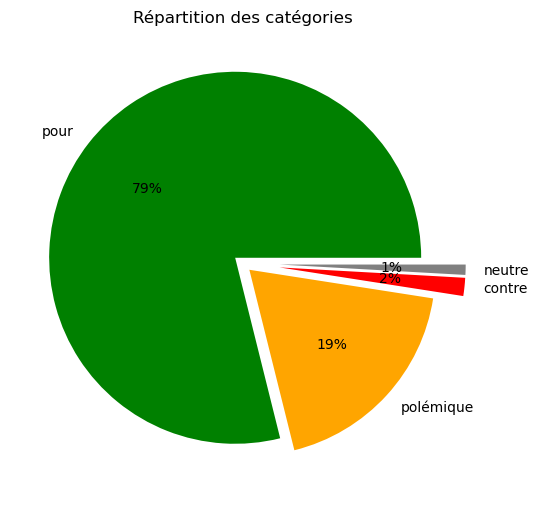

In [27]:
import matplotlib.pyplot as plt

# Calculer les proportions pour chaque cat√©gorie
proportions = data['Cat√©gorie'].value_counts(normalize=True)  # Proportions (%)
categories = proportions.index  # Les cat√©gories
values = proportions.values  # Les proportions

# Param√®tres du graphique
explode = [0.05] * (len(categories) - 2) + [0.2, 0.2]  # S√©pare chaque tranche l√©g√®rement
labels = categories  # Labels provenant des cat√©gories
colors = ['green','orange', 'red', 'grey'][:len(categories)]  # Limiter les couleurs √† la taille des cat√©gories

# Dessiner le camembert
plt.figure(figsize=(6,12))  # Ajuster la taille
plt.pie(
    values, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
plt.title("R√©partition des cat√©gories")
plt.show()


* ## Distribution moyenne des types de vote

* ## Categorisation des propositions

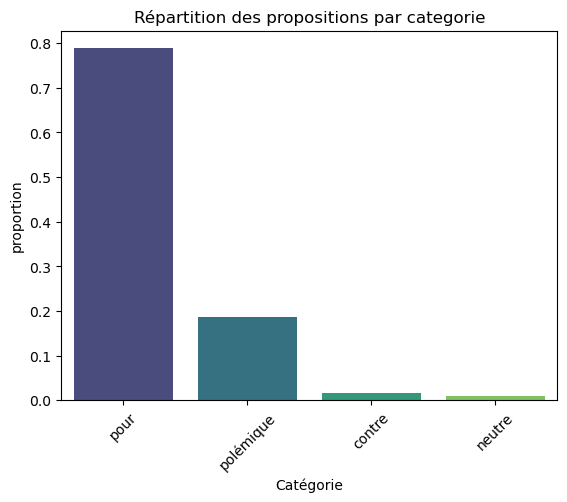

In [28]:
sns.countplot(data=data, x='Cat√©gorie', palette='viridis', hue = "Cat√©gorie",stat="proportion")
plt.title('R√©partition des propositions par categorie')
plt.xticks(rotation=45)
plt.show()

* ## Distribution des zones d'adh√©sion

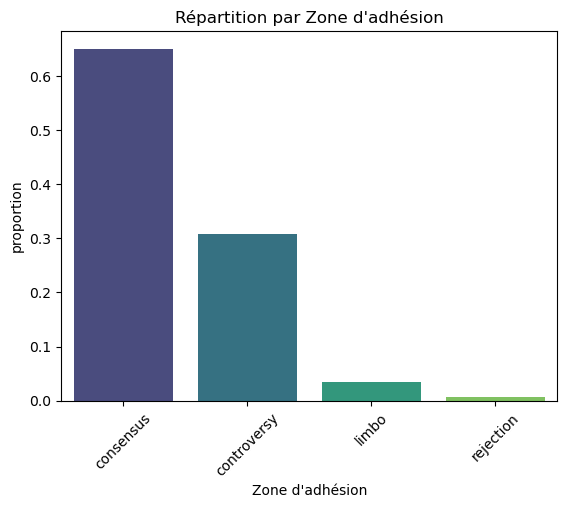

In [29]:
sns.countplot(data=data, x='Zone d\'adh√©sion', palette='viridis', hue="Zone d\'adh√©sion",stat='proportion')
plt.title('R√©partition par Zone d\'adh√©sion')
plt.xticks(rotation=45)
plt.show()

* # Analyse des mots les plus fr√©quents dans les propositions (sans nettoyage initial).

In [30]:
from collections import Counter

# Compter les mots 
word_counts = Counter(" ".join(data['Proposition']).split())
print(word_counts.most_common(10)) 


[('Il', 1911), ('faut', 1907), ('les', 1554), ('de', 1440), ('des', 1052), ('et', 927), ('pour', 736), ('√†', 727), ('le', 717), ('la', 688)]


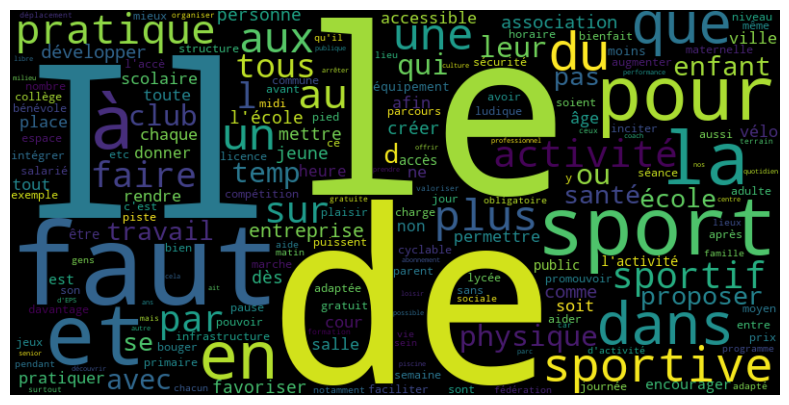

In [31]:
# G√©n√©rer un nuage de mots √† partir des propositions pour visualiser les mots les plus fr√©quents
# On fusionne toutes les propositions en une seule cha√Æne de caract√®res
text = " ".join(data['Proposition']) #
wordcloud = WordCloud(width=800, height=400, background_color="black",
                      prefer_horizontal=1.0,collocations=False).generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear") # Pour afficher l'image avec une interpolation fluide
plt.axis("off") # D√©sactive les axes pour un affichage propre
plt.show()

* # Pr√©traitement des donn√©es textuelles

In [32]:
import unicodedata

def remove_accents(text):
    # Normalise le texte en supprimant les accents
    text = unicodedata.normalize('NFKD', text)
    text = ''.join(char for char in text if not unicodedata.combining(char))
    return text


In [33]:
import spacy
nlp = spacy.load("fr_core_news_sm") 
def preprocess_with_spacy(text):
    # Analyser le texte avec spaCy
    doc = nlp(text.lower())  # Mise en minuscule
    cleaned_tokens = []
    mots_inutils = ['faire','falloir','tous','sport','etre','sportif']
    for token in doc:
        if not token.is_stop and token.is_alpha and token.lemma_ not in mots_inutils:  # Exclure stopwords et non-alphabetiques
            cleaned_tokens.append(remove_accents(token.lemma_))  # Ajouter la forme lemmatis√©e du mot

    return " ".join(cleaned_tokens)
# Nettoyer les propositions
data['cleaned_propositions'] = data['Proposition'].apply(preprocess_with_spacy)

In [34]:
print(data['cleaned_propositions'])

0       sensibiliser enfant jeune age ecole maternel p...
1       commune faciliter marche ville amenager itiner...
2       ecole lien sante demontrer jeune meilleur moye...
3       rigoureux enfance etat esprit bienveillant dro...
4       permettre handicap souhaiter rencontrer struct...
                              ...                        
1904        adopter chien minimum minute marche fois jour
1905    pouvoir exclure membre federation resultat evi...
1906      reduire nombre arret bus ville obliger marche m
1907    inciter francais equiper montre connecter stim...
1908       encourager garcon inscrire club football rugby
Name: cleaned_propositions, Length: 1909, dtype: object


* ## Statistique descriptive des prpositions nettoy√©es

In [35]:
nb_mots = [len(proposition.split()) for proposition in data["cleaned_propositions"]]

# Cr√©er un DataFrame
df = pd.Series(nb_mots)
# Afficher le r√©sultat dans un format similaire
print(df.describe())

count    1909.000000
mean        7.778418
std         2.297715
min         1.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        14.000000
dtype: float64


* ## Les mots les plus frequents

In [36]:
# Compter les mots 
word_counts = Counter(" ".join(data['cleaned_propositions']).split())
print(word_counts.most_common(20)) 

[('activite', 295), ('pratique', 241), ('ecole', 211), ('physique', 165), ('temps', 159), ('club', 156), ('proposer', 148), ('enfant', 142), ('sante', 127), ('travail', 126), ('entreprise', 122), ('developper', 113), ('favoriser', 109), ('association', 107), ('mettre', 105), ('creer', 102), ('jeune', 96), ('permettre', 96), ('pouvoir', 94), ('age', 91)]


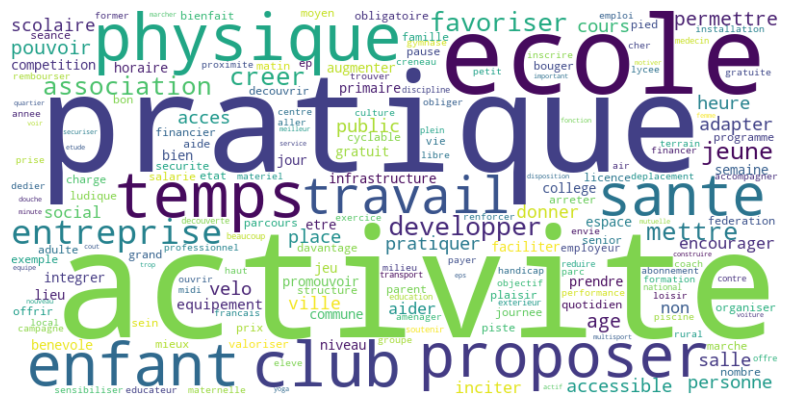

In [37]:
text = " ".join(data['cleaned_propositions']) 
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      prefer_horizontal=1.0,collocations=False,normalize_plurals=False).generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") # D√©sactive les axes pour un affichage propre
plt.show()

* # Mod√©lisation des th√©matiques avec Word2Vec

In [38]:
# pip install --upgrade scipy gensim
# pip install gensim

In [39]:
from gensim.models import Word2Vec # Biblioth√®que pour entra√Æner des mod√®les Word2Vec

In [40]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entra√Æner le mod√®le Word2Vec
# vector_size : taille des vecteurs (100 dimensions)
# window : nombre de mots voisins consid√©r√©s
# min_count : ignorer les mots qui apparaissent moins de 2 fois
# workers : nombre de c≈ìurs utilis√©s pour le traitement
model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=17,sg=1,  min_count=1, workers=5)

# Exemples de mots similaires
print(model.wv.most_similar("club"))


[('association', 0.9994156956672668), ('accessible', 0.9993308186531067), ('cher', 0.999324381351471), ('salle', 0.9992925524711609), ('aider', 0.9992921352386475), ('offrir', 0.999291718006134), ('famille', 0.999287486076355), ('inscription', 0.999278724193573), ('creer', 0.999259889125824), ('local', 0.9992513060569763)]


* # Entra√Æner Skip-Gram (sg=1) ou CBOW (sg=0)

In [ ]:
# Entra√Æner Skip-Gram (sg=1) ou CBOW (sg=0)
skip_gram_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=1, min_count=2)



* # Analyse des th√©matiques

In [47]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [48]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entra√Æner le mod√®le Word2Vec
# vector_size : taille des vecteurs (100 dimensions)
# window : nombre de mots voisins consid√©r√©s
# min_count : ignorer les mots qui apparaissent moins de 2 fois
# workers : nombre de c≈ìurs utilis√©s pour le traitement
model = Word2Vec(sentences=tokenized_sentences, vector_size=300, window=17,sg=1,  min_count=2, workers=5)

# Exemples de mots similaires
print(model.wv.most_similar("velo"))


[('deplacement', 0.9991779327392578), ('pied', 0.9990437626838684), ('securiser', 0.9989622831344604), ('voiture', 0.9989129304885864), ('mobilite', 0.9988550543785095), ('ville', 0.9988299608230591), ('rural', 0.9987840056419373), ('marche', 0.9987494349479675), ('trajet', 0.9987154006958008), ('actif', 0.9986868500709534)]


* ## Analyse des mots

In [74]:
# R√©cup√©rer les mots et leurs vecteurs
words = list(model.wv.index_to_key)  # Tous les mots du vocabulaire
vectors = model.wv[words]  # Les vecteurs correspondants
#print(words)
#print(vectors)

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# R√©duction des vecteurs √† 50 dimensions avec t-SNE
# R√©duction de dimension √† 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(vectors_pca_50)

# Pr√©parer les donn√©es pour le graphique
df = pd.DataFrame(vectors_pca_50, columns=['Dim1', 'Dim2'])
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters

# Afficher un aper√ßu des donn√©es
print(df.head())


ValueError: Shape of passed values is (1337, 50), indices imply (1337, 2)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# R√©duction de dimension √† 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
# word_vectors_2d = tsne.fit_transform(vectors_pca_50)
# Appliquer le clustering K-Means
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(vectors_pca_50)

# Pr√©parer les donn√©es pour le graphique
dim = []
for i in range(1,51):
    dim.append("Dim"+str(i))
df = pd.DataFrame(vectors_pca_50, columns=dim)  # Dimensions r√©duites avec t-SNE
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters
# Cr√©er le graphique interactif
fig = px.scatter(
    df,
    x='Dim1',
    y='Dim2',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='word',  # Afficher le mot lors du survol
    title="Projection des vecteurs de mots (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2'},
    color_continuous_scale='hsv',  # Choisir une palette de couleurs
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},  # Assurez-vous que les clusters sont dans un ordre compr√©hensible
    width=1000,
    height=600
)

# Personnaliser les points
fig.update_traces(marker=dict(size=10, opacity=0.9, line=dict(width=1.5, color='white')))

# Ajouter un titre pour la l√©gende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.5,  # Centrer le titre
)

# Afficher le graphique
fig.show()


In [88]:
pip install hdbscan

   ---------------------------------------- 0.0/726.2 kB ? eta -:--:--
   ---------------------------------------- 726.2/726.2 kB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import hdbscan
import pandas as pd
import plotly.express as px

# √âtape 1 : Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# √âtape 2 : R√©duction de dimension avec PCA (optionnel)
# pca = PCA(n_components=50)  # R√©duction initiale √† 50D
# vectors_pca = pca.fit_transform(vectors_normalized)

# √âtape 3 : R√©duction de dimension avec UMAP (appliqu√© apr√®s PCA)
umap_reducer = umap.UMAP(n_components=2, 
                          n_neighbors=15,  # Teste aussi 30 ou 50
                          min_dist=0.1,    # Teste aussi 0.3 ou 0.5
                          metric='cosine', # Meilleur pour Word2Vec
                          random_state=42)
word_vectors_2D = umap_reducer.fit_transform(vectors_normalized)

# √âtape 4 : Clustering avec HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2)
clusters = clusterer.fit_predict(word_vectors_2D)

# √âtape 5 : Pr√©paration des donn√©es pour le graphique
df = pd.DataFrame(word_vectors_2D, columns=["Dim1", "Dim2"])  
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters #.astype(str)  # Convertir les clusters en string pour la couleur

# Cr√©er le graphique interactif avec Plotly
fig = px.scatter(
    df,
    x='Dim1',
    y='Dim2',
    color='cluster',  
    hover_name='word',
    title="Projection des vecteurs de mots (UMAP avec Clustering HDBSCAN)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2'},
    color_discrete_sequence=px.colors.qualitative.Set1,  
    width=1000,
    height=600
)

# Personnalisation des points
fig.update_traces(marker=dict(size=10, opacity=0.9, line=dict(width=1.5, color='white')))

# Centrage du titre
fig.update_layout(legend_title="Clusters", title_x=0.5)

# Afficher le graphique
fig.show()


c:\Users\DELL\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors_2d)

# Pr√©parer les donn√©es pour le graphique
df = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])  # Dimensions r√©duites avec t-SNE
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters

# Cr√©er le graphique interactif
fig = px.scatter(
    df,
    x='Dim1',
    y='Dim2',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='word',  # Afficher le mot lors du survol
    title="Projection des vecteurs de mots (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2'},
    color_continuous_scale='hsv',  # Choisir une palette de couleurs
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},  # Assurez-vous que les clusters sont dans un ordre compr√©hensible
    width=1000,
    height=600
)

# Personnaliser les points
fig.update_traces(marker=dict(size=10, opacity=0.9, line=dict(width=1.5, color='white')))

# Ajouter un titre pour la l√©gende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.5,  # Centrer le titre
)

# Afficher le graphique
fig.show()


* ## Analyse des propositions

In [65]:
# Fonction pour calculer le vecteur moyen d'une proposition

def get_mean_vector(sentence, model):
    words = sentence.split()  # Tokenisation simple
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:  # Si des mots de la proposition sont dans le mod√®le
        return np.mean(word_vectors, axis=0)
    else:  # Si aucun mot de la proposition n'est dans le mod√®le
        return np.zeros(model.vector_size)


In [66]:
# Calculer un vecteur moyen pour chaque proposition

data['mean_vector'] = data.apply(
    lambda row: get_mean_vector(row['cleaned_propositions'], model),
    axis=1
)
print(data['mean_vector'])


0       [0.0071429424, 0.15368968, -0.019676436, 0.037...
1       [0.007115302, 0.145086, -0.019953804, 0.034377...
2       [0.007894918, 0.14912349, -0.019134087, 0.0364...
3       [0.0052050687, 0.13610661, -0.018580185, 0.034...
4       [0.008038804, 0.13388275, -0.01855674, 0.03166...
                              ...                        
1904    [0.0067573907, 0.14756903, -0.020298788, 0.036...
1905    [0.004955352, 0.136221, -0.017726636, 0.033324...
1906    [0.005575946, 0.14367324, -0.018931532, 0.0341...
1907    [0.00690375, 0.13926524, -0.019921595, 0.03428...
1908    [0.0071736, 0.11609844, -0.015553264, 0.028643...
Name: mean_vector, Length: 1909, dtype: object


In [67]:
# Convertir les vecteurs en liste pour compatibilit√© avec kmeans
proposition_vectors = np.vstack(data['mean_vector'].values)
len(proposition_vectors)

1909

In [68]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# R√©duction de dimension √† 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(vectors_pca_50)
data['cluster'] = cluster

# Pr√©parer les donn√©es pour le graphique
dim = []
for i in range(1,51):
    dim.append("Dim"+str(i))
df1 = pd.DataFrame(vectors_pca_50, columns=dim)
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Cat√©gorie']
df1['proposition_vectors'] = data['mean_vector']

# Cr√©er le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence='hsv',  # Utiliser la palette tab10 comme s√©quence discr√®te
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une √©paisseur de 2
))

# Ajouter un titre pour la l√©gende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()


In [93]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# R√©duction de dimension √† 50 avec PCA
pca = PCA(n_components=50, random_state=42)
vectors_pca_50 = pca.fit_transform(vectors_normalized)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(word_vectors_2d)
data['cluster'] = cluster

# Pr√©parer les donn√©es pour le graphique
dim = []
for i in range(1,51):
    dim.append("Dim"+str(i))
df1 = pd.DataFrame(word_vectors_2d, columns=('Dim1','Dim2'))
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Cat√©gorie']
df1['proposition_vectors'] = data['mean_vector']

# Cr√©er le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence='hsv',  # Utiliser la palette tab10 comme s√©quence discr√®te
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une √©paisseur de 2
))

# Ajouter un titre pour la l√©gende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()


In [70]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcul de la similarit√© entre les centro√Ødes des clusters
cos_sim_clusters = cosine_similarity(kmeans.cluster_centers_)

# Affichage des similarit√©s entre clusters
print("Matrice de similarit√© cosinus entre clusters :")
print(cos_sim_clusters)


Matrice de similarit√© cosinus entre clusters :
[[ 0.99999994 -0.99937004  0.9322698  -0.9845178   0.9569482   0.9984773
   0.9360127  -0.99694234  0.6425623  -0.97663695  0.9942362  -0.95908314
  -0.9988129   0.8439339  -0.2039355 ]
 [-0.99937004  0.99999994 -0.94452065  0.9901181  -0.94604486 -0.99589074
  -0.9479135   0.9990874  -0.6693493   0.9683957  -0.99741465  0.9685264
   0.99991244 -0.82436514  0.23854871]
 [ 0.9322698  -0.94452065  1.         -0.9812478   0.7871289   0.91089416
   0.999945   -0.9576878   0.8762369  -0.83274794  0.96568173 -0.9965485
  -0.94878507  0.59270704 -0.5442839 ]
 [-0.9845178   0.9901181  -0.9812478   1.         -0.8912548  -0.9733495
  -0.98321533  0.9952044  -0.7669228   0.92384887 -0.99763584  0.99386173
   0.99188745 -0.73683727  0.37237868]
 [ 0.9569482  -0.94604486  0.7871289  -0.8912548   1.          0.9715028
   0.7935544  -0.93134123  0.39249304 -0.99696636  0.9203135  -0.8356136
  -0.94167346  0.9633095   0.08900303]
 [ 0.9984773  -0.995890

In [71]:
#  Calcul de la matrice de similarit√© cosinus entre clusters
cluster_centers = kmeans.cluster_centers_
similarity_matrix = cosine_similarity(cluster_centers)

# Affichage des r√©sultats
print("Matrice de similarit√© cosinus entre clusters :")
print(similarity_matrix)

# Fusion des clusters similaires (si similarity > 0.9)
threshold = 0.9
merged_clusters = {}
for i in range(n_clusters):
    merged_clusters[i] = [i]  # Initialiser chaque cluster avec lui-m√™me
    for j in range(n_clusters):
        if i != j and similarity_matrix[i, j] > threshold:
            merged_clusters[i].append(j)

print("\nClusters fusionn√©s :")
print(merged_clusters)

Matrice de similarit√© cosinus entre clusters :
[[ 0.99999994 -0.99937004  0.9322698  -0.9845178   0.9569482   0.9984773
   0.9360127  -0.99694234  0.6425623  -0.97663695  0.9942362  -0.95908314
  -0.9988129   0.8439339  -0.2039355 ]
 [-0.99937004  0.99999994 -0.94452065  0.9901181  -0.94604486 -0.99589074
  -0.9479135   0.9990874  -0.6693493   0.9683957  -0.99741465  0.9685264
   0.99991244 -0.82436514  0.23854871]
 [ 0.9322698  -0.94452065  1.         -0.9812478   0.7871289   0.91089416
   0.999945   -0.9576878   0.8762369  -0.83274794  0.96568173 -0.9965485
  -0.94878507  0.59270704 -0.5442839 ]
 [-0.9845178   0.9901181  -0.9812478   1.         -0.8912548  -0.9733495
  -0.98321533  0.9952044  -0.7669228   0.92384887 -0.99763584  0.99386173
   0.99188745 -0.73683727  0.37237868]
 [ 0.9569482  -0.94604486  0.7871289  -0.8912548   1.          0.9715028
   0.7935544  -0.93134123  0.39249304 -0.99696636  0.9203135  -0.8356136
  -0.94167346  0.9633095   0.08900303]
 [ 0.9984773  -0.995890

In [72]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# R√©duction de dimension √† 50 avec PCA
# pca = PCA(n_components=50, random_state=42)
# vectors_pca_50 = pca.fit_transform(vectors_normalized)

# R√©duction des vecteurs √† 2 dimensions avec t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
# word_vectors_2d = tsne.fit_transform(vectors_pca_50)

# Appliquer le clustering K-Means
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(vectors_normalized)
data['cluster'] = cluster

# Pr√©parer les donn√©es pour le graphique
dim = []
for i in range(1,301):
    dim.append("Dim"+str(i))
df1 = pd.DataFrame(vectors_normalized, columns=dim)
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Cat√©gorie']
df1['proposition_vectors'] = data['mean_vector']

# Cr√©er le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence='hsv',  # Utiliser la palette tab10 comme s√©quence discr√®te
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une √©paisseur de 2
))

# Ajouter un titre pour la l√©gende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()
